In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import optimize
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
from PIL import Image 
import numpy.polynomial.polynomial as poly

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/SingleMolecule-selected-092817/CutImages/BaSmall/Sample3

/Users/austinmcdonald/Desktop/SingleMolecule-selected-092817/CutImages/BaSmall/Sample3


In [3]:
os.listdir()[2]

'BaCutImage11_00003.tif'

In [7]:
im = Image.open('BaCutImage11_00003.tif')

In [8]:
Imdat = np.array(im)


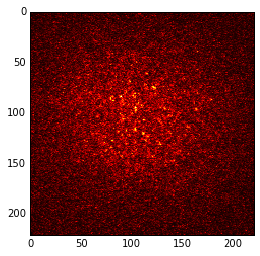

In [9]:
plt.imshow(Imdat, cmap='hot', interpolation='nearest')
plt.show()

In [10]:
Imdat.shape

(221, 221)

In [11]:
xvs = np.arange(0,221)
print(len(xvs))

221


In [13]:
K=4
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 
ma = running_mean(Imdat[111],K)
maxvs = running_mean(xvs,K)
len(ma)


218

(2000, 12000)

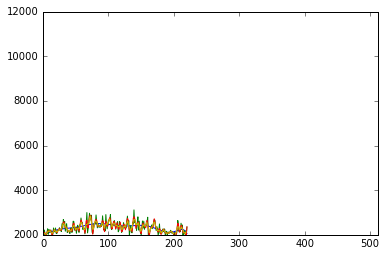

In [14]:
sxvs = savgol_filter(xvs, 11, 6)
sdat = savgol_filter(Imdat[111], 11, 6)
#ma = np.ma.array(Imdat[250])

coefs = poly.polyfit(xvs, Imdat[111], 11)
ffit = poly.polyval(xvs, coefs)
plt.plot(xvs, ffit)
plt.plot(xvs,Imdat[111])
plt.plot(sxvs,sdat)
plt.plot(maxvs,ma,color='y')
plt.xlim(0,512)
plt.ylim(2000,12000)

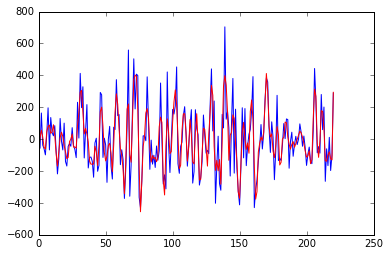

In [16]:
eh=Imdat[111]-ffit
sxvs = savgol_filter(xvs, 11, 6)
sdat = savgol_filter(eh, 11, 6)
plt.plot(xvs,eh)
plt.plot(sxvs,sdat,color='r')


In [16]:
np.mean(abs(Imdat[250]-ffit))

480.03617043287818

In [17]:
# Background subtraction 
Im2=[]
xvs = np.arange(0,221)
for x in range(0,221):
    coefs = poly.polyfit(xvs, Imdat[x], 11) # fits 11th order poly 
    ffit = poly.polyval(xvs, coefs)
    hold = Imdat[x]-(ffit)
    hold[hold < 0] = 0  # replaces negtive values form the sub with 0
    Im2.append(hold)

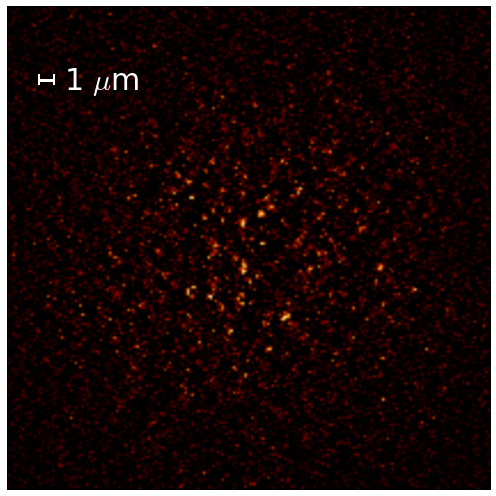

In [21]:
Row = 130
Col = 130
Xindex = 390 
Yindex = 240
x = np.array(Im2)#[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
plt.figure(figsize=(7,7))

plt.imshow(x, cmap='afmhot', interpolation='gaussian')
#plt.imshow(Imdat)
plt.xlim(0,211)
plt.ylim(0,211)
plt.plot([14,14+6.25],[179,179],linewidth=3,color='white')
plt.plot([14,14],[177,181],linewidth=2,color='white')
plt.plot([14+6.5,14+6.5],[177,181],linewidth=2,color='white')
plt.text(25,175,r'1 $\mu$m',rotation=0,fontsize=30,color='white')
plt.tick_params(labelbottom='off',labelleft='off')
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/BaImage.pdf')

plt.show()

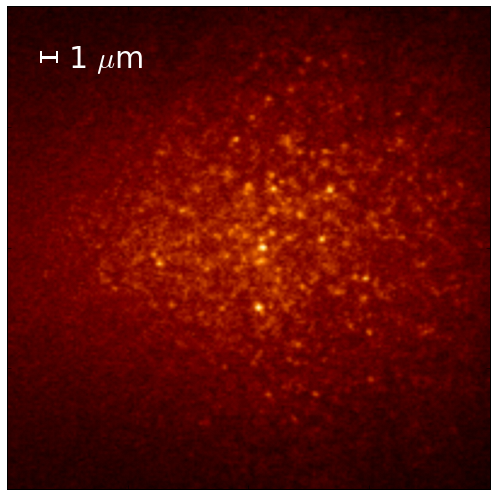

In [42]:
# 1 mu M = 6.25 pix

Row = 130
Col = 130
Xindex = 390 
Yindex = 240
x = Imdat[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
plt.figure(figsize=(7,7))
plt.imshow(x, cmap='afmhot', interpolation='gaussian')
#plt.imshow(Imdat)
plt.xlim(0,200)
plt.ylim(0,200)
plt.plot([14,14+6.25],[179,179],linewidth=3,color='white')
plt.plot([14,14],[177,181],linewidth=2,color='white')
plt.plot([14+6.5,14+6.5],[177,181],linewidth=2,color='white')
plt.text(25,175,r'1 $\mu$m',rotation=0,fontsize=30,color='white')
plt.tick_params(labelbottom='off',labelleft='off')
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/beforeBS.pdf')

plt.show()

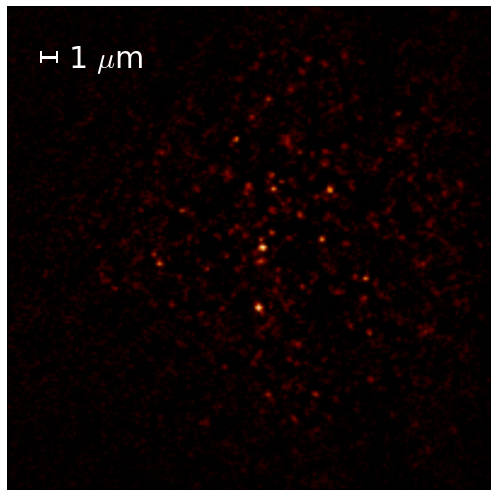

In [43]:
Row = 130
Col = 130
Xindex = 390 
Yindex = 240
x = np.array(Im2)[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
plt.figure(figsize=(7,7))

plt.imshow(x, cmap='afmhot', interpolation='gaussian')
#plt.imshow(Imdat)
plt.xlim(0,200)
plt.ylim(0,200)
plt.plot([14,14+6.25],[179,179],linewidth=3,color='white')
plt.plot([14,14],[177,181],linewidth=2,color='white')
plt.plot([14+6.5,14+6.5],[177,181],linewidth=2,color='white')
plt.text(25,175,r'1 $\mu$m',rotation=0,fontsize=30,color='white')
plt.tick_params(labelbottom='off',labelleft='off')
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/afterBS.pdf')

plt.show()

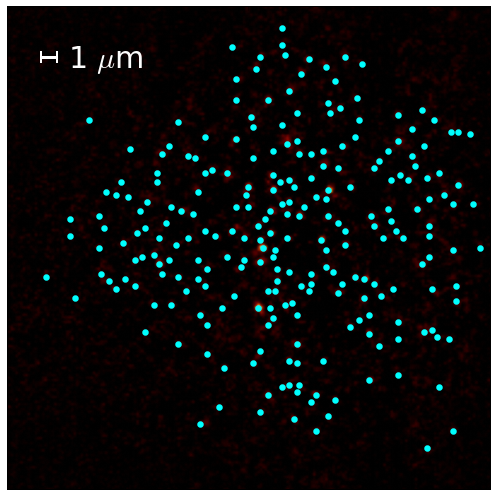

In [44]:
Row = 130
Col = 130
Xindex = 390 
Yindex = 240
xc = np.array(Xc)
yc = np.array(Yc)

x = np.array(Im2)[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
plt.figure(figsize=(7,7))

plt.imshow(x, cmap='afmhot', interpolation='gaussian')
plt.scatter(xc,yc, color='aqua',linewidth=2)

#plt.imshow(Imdat)
plt.xlim(0,200)
plt.ylim(0,200)
plt.plot([14,14+6.25],[179,179],linewidth=3,color='white')
plt.plot([14,14],[177,181],linewidth=2,color='white')
plt.plot([14+6.5,14+6.5],[177,181],linewidth=2,color='white')
plt.text(25,175,r'1 $\mu$m',rotation=0,fontsize=30,color='white')
plt.tick_params(labelbottom='off',labelleft='off')
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/afterBS-possable.pdf')

plt.show()

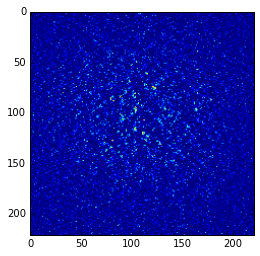

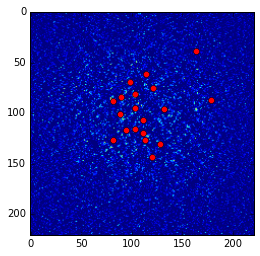

In [26]:

#fname = 'RImHW.png'
neighborhood_size = 9
threshold = 1200


data = np.array(Im2)
 #scipy.misc.imread(fname)

data_max = filters.maximum_filter(data, neighborhood_size)
maxima = (data == data_max)
data_min = filters.minimum_filter(data, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)
x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)
plt.imshow(data)
#plt.xlim(300,500)
#plt.ylim(100,300)
plt.show()
plt.imshow(data)
#plt.savefig('/tmp/data.png', bbox_inches = 'tight')

plt.autoscale(False)
plt.plot(x,y, 'ro')
#plt.xlim(300,500)
#plt.ylim(100,300)
plt.show()
Xc = x
Yc = y
#plt.savefig('/tmp/result.png', bbox_inches = 'tight')


In [111]:
len(x)

255

In [112]:
Im3=np.array(Im2)

In [113]:
Row = int(3)
Col = int(3)
Xindex = int(Xc[5] )
Yindex = int(Yc[5])
testspot = Im3[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]


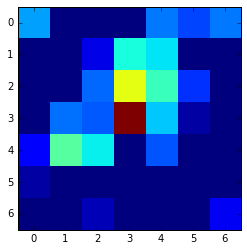

In [114]:
plt.imshow(testspot, interpolation='nearest')
#plt.xlim(300,500)
#plt.ylim(100,300)
plt.show()

In [115]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

height fit = 2042.95401345
x fit = 2.43632217699
y fit = 3.1316423303
sigmax fit = 1.07774625336
sigmay fit = 0.872116968473


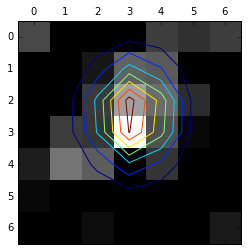

In [116]:
plt.matshow(testspot,cmap='gray')
params = fitgaussian(testspot)
fit = gaussian(*params)
plt.contour(fit(*np.indices(testspot.shape)))
print('height fit =', params[0])
print('x fit =', params[1])
print('y fit =', params[2])
print('sigmax fit =', params[3])
print('sigmay fit =', params[4])

In [117]:
# this block ftis all points in one slice to a gauss 
Im3=np.array(Im2)
SpotInfo = []
Row = int(3)
Col = int(3)
for q in range(0,len(Xc)):
    Xindex = int(Xc[q] )
    Yindex = int(Yc[q])
    spot= Im3[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
    params = fitgaussian(spot)
    if (params[1]>0 and params[1]<6 and params[2]>0 and params[2]<6) : # rids the ones that fit off the grid
        SpotInfo.append([Xindex,Yindex,*params])
#SpotInfo [xindex, yindex, height, x fit, y fit, sigma_x, sigma_y]

//anaconda/envs/py35/lib/python3.5/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)


In [123]:
SpotInfo5 = SpotInfo[5]
SpotInfoT = SpotInfo
SpotInfo5

[393,
 140,
 2042.9540134511074,
 2.4363221769905157,
 3.1316423303011951,
 1.0777462533607876,
 0.87211696847278286]

In [118]:
# area under 2d gaussian = 2*pi*H*sigmax*sigmay
#area =2*np.pi* params[0]*params[3]*params[4]
area =[]
for x in range(0,len(SpotInfo)):
    height = SpotInfo[x][2]
    sigmax = SpotInfo[x][5]
    sigmay = SpotInfo[x][6]
    hold   = 2*np.pi*height*sigmax*sigmay
    area.append(hold)

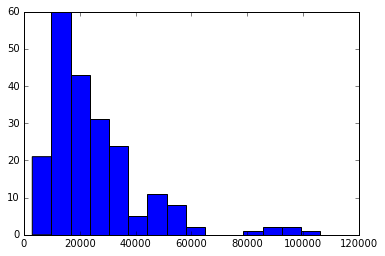

211

In [119]:
plt.hist(area,15)
plt.show()
len(area)

In [114]:
len(SpotInfo)

211

In [166]:
files = os.listdir()
files = files[5:9]
files

['Image6_00006.tif',
 'Image6_00007.tif',
 'Image6_00008.tif',
 'Image6_00009.tif']

In [167]:
neighborhood_size = 5
threshold = 2000

In [168]:

AllPairs =[]
for q in range(0,len(files)):
    Images = np.array(Image.open(files[q]))
    ImageB = []
    for x in range(0,512):
        coefs = poly.polyfit(xvs, Images[x], 11) # fits 11th order poly 
        ffit  = poly.polyval(xvs, coefs)
        hold  = Images[x]-(ffit)
        hold[hold < 0] = 0        # replaces negtive values form the sub with 0
        ImageB.append(hold)

    data = ImageB
    
    data_max = filters.maximum_filter(data, neighborhood_size)
    maxima = (data == data_max)
    data_min = filters.minimum_filter(data, neighborhood_size)
    diff = ((data_max - data_min) > threshold)
    maxima[diff == 0] = 0

    labeled, num_objects = ndimage.label(maxima)
    slices = ndimage.find_objects(labeled)
    x, y = [], []
    Pairs = []
    for dy,dx in slices:
        x_center = (dx.start + dx.stop - 1)/2
        x.append(x_center)
        y_center = (dy.start + dy.stop - 1)/2    
        y.append(y_center)
        Pairs.append((x_center,y_center))
    for item in Pairs:
        if item not in AllPairs:
            AllPairs.append(item)        

In [169]:
len(AllPairs)

799

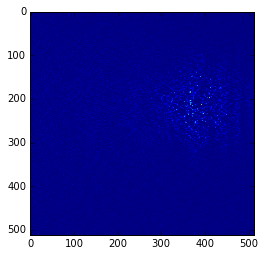

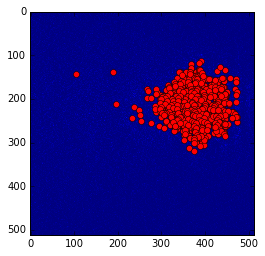

In [170]:
plt.imshow(data)
#plt.xlim(300,500)
#plt.ylim(100,300)
plt.show()
plt.imshow(data)
#plt.savefig('/tmp/data.png', bbox_inches = 'tight')

plt.autoscale(False)
a,b = zip(*AllPairs)

plt.plot(a,b, 'ro')
#plt.xlim(300,500)
#plt.ylim(100,300)
plt.show()

In [171]:
len(AllPairs)

799

In [200]:
SpotInfo = []
SpotInfoHolder = []

Row = int(3)
Col = int(3)
Xc,Yc = zip(*AllPairs)

for q in range(0,len(files)):
    Images = np.array(Image.open(files[q]))
    ImageA = []
    SpotInfoHolder = []
    ImageB = []

    for x in range(0,512):
        coefs = poly.polyfit(xvs, Images[x], 11) # fits 11th order poly 
        ffit  = poly.polyval(xvs, coefs)
        hold  = Images[x]-(ffit)
        hold[hold < 0] = 0        # replaces negtive values form the sub with 0
        ImageB.append(hold)
    ImageB=np.array(ImageB)

    for w in range(0,len(Xc)):
        Xindex = int(Xc[w])
        Yindex = int(Yc[w])
        spot = ImageB[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
        params = fitgaussian(spot)
        if (params[1]>0 and params[1]<6 and params[2]>0 and params[2]<6
               and params[3]>0 and params[3]<3 and params[4]>0 and params[4]<3) : # rids the ones that fit off the grid
            SpotInfoHolder.append([Xindex,Yindex,*params])
    SpotInfo.append(SpotInfoHolder)
#SpotInfo [xindex, yindex, height, x fit, y fit, sigma_x, sigma_y]


//anaconda/envs/py35/lib/python3.5/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)


In [201]:
len(SpotInfo[0])

468

In [173]:
len(Xc)

799

In [202]:
# area under 2d gaussian = 2*pi*H*sigmax*sigmay
#area =2*np.pi* params[0]*params[3]*params[4]
area =[]
areaHolder=[]
for y in range(0,len(SpotInfo)):
    areaHolder=[]
    for x in range(0,len(SpotInfo[y])):
        height = SpotInfo[y][x][2]
        sigmax = SpotInfo[y][x][5]
        sigmay = SpotInfo[y][x][6]
        hold   = 2*np.pi*height*sigmax*sigmay
        areaHolder.append(hold)
    area.append(areaHolder)

In [184]:
len(area[3])

537

In [196]:
SpotInfo[3][5]

[427,
 136,
 1224.1586248224555,
 3.4896104229919915,
 4.5828485689497294,
 1.9027247087867447,
 1.7455862192771472]

In [177]:
SpotInfo5

[393,
 140,
 2042.9540134511074,
 2.4363221769905157,
 3.1316423303011951,
 1.0777462533607876,
 0.87211696847278286]

In [188]:
max(area[0])

93149.67099525746

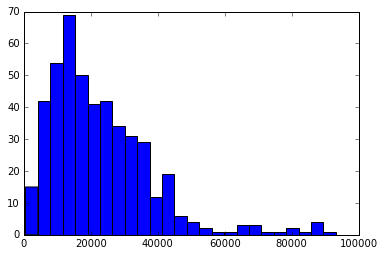

In [211]:
aaa = np.array(area[0])
aa = aaa[aaa>0]
plt.hist(aa,25)
plt.show()

In [205]:
len(aaa)

468

In [ ]:
# this block ftis all points in one slice to a gauss 
Im3=np.array(Im2)
SpotInfo = []
Row = int(3)
Col = int(3)
for q in range(0,len(Xc)):
    Xindex = int(Xc[q])
    Yindex = int(Yc[q])
    spot= Im3[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
    params = fitgaussian(spot)
    if (params[1]>0 and params[1]<6 and params[2]>0 and params[2]<6) : # rids the ones that fit off the grid
        SpotInfo.append([Xindex,Yindex,*params])
#SpotInfo [xindex, yindex, height, x fit, y fit, sigma_x, sigma_y]

In [ ]:

#fname = 'RImHW.png'
neighborhood_size = 5
threshold = 2000

data = Im2 #scipy.misc.imread(fname)

data_max = filters.maximum_filter(data, neighborhood_size)
maxima = (data == data_max)
data_min = filters.minimum_filter(data, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)
x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)
plt.imshow(data)
#plt.xlim(300,500)
#plt.ylim(100,300)
plt.show()
plt.imshow(data)
#plt.savefig('/tmp/data.png', bbox_inches = 'tight')

plt.autoscale(False)
plt.plot(x,y, 'ro')
#plt.xlim(300,500)
#plt.ylim(100,300)
plt.show()
Xc = x
Yc = y
#plt.savefig('/tmp/result.png', bbox_inches = 'tight')


In [ ]:
Im3=np.array(Im2)
SpotInfo = []
Row = int(3)
Col = int(3)
for q in range(0,len(Xc)):
    Xindex = int(Xc[q] )
    Yindex = int(Yc[q])
    spot= Im3[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
    params = fitgaussian(spot)
    if (params[1]>0 and params[1]<6 and params[2]>0 and params[2]<6) : # rids the ones that fit off the grid
        SpotInfo.append([Xindex,Yindex,*params])
#SpotInfo [xindex, yindex, height, x fit, y fit, sigma_x, sigma_y]

In [ ]:
# this block ftis all points in one slice to a gauss 
Im3=np.array(Im2)
SpotInfo = []
Row = int(3)
Col = int(3)
for q in range(0,len(Xc)):
    Xindex = int(Xc[q] )
    Yindex = int(Yc[q])
    spot= Im3[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
    params = fitgaussian(spot)
    if (params[1]>0 and params[1]<6 and params[2]>0 and params[2]<6) : # rids the ones that fit off the grid
        SpotInfo.append([Xindex,Yindex,*params])
#SpotInfo [xindex, yindex, height, x fit, y fit, sigma_x, sigma_y]